We became familiar with several ML techniques for Classification.

In this activity we will use Artificial Neural Networks (ANN) for classification and compare it with a logistic regression classifier.

# Dataset

We will use the ***BankCustomers_ChurnModeling*** dataset.
Download the dataset from elearn and upload it to your colab environment (on the left bar under "Files", click on Upload and browse to where you downloaded the file - as we did before).  

In [2]:
#import dataset
import pandas as pd
df = pd.read_csv('BankCustomers_ChurnModeling.csv')
#defining input and outcome variables
y = df[['LeftBank']]  # y=Whether the customer left the bank (1) or not (0)
X = df.iloc[:, 3:13] # X=all other variables except for ID, Surname, row
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,LeftBank
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


The outcome we want to predict is the binary variable "LeftBank"; which indicates whether the customer has left the bank (1) or not (0).

Hence, we want to build a binary Classifier

In [3]:
#RUN CELL ONCE ONLY! otherwise start from above
#dummy encoding Geography and Gender variables
X=pd.concat([X,pd.get_dummies(X[['Geography','Gender']])],axis=1)
# drop the Original vars, since we now have the binary encoded vars
X.drop(X[['Geography','Gender']],axis=1,inplace=True)
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0


## Scaling the data

In [4]:
# Feature Scaling, using MinMax scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler()
X_sc=pd.DataFrame(sc.fit_transform(X))
#Note: MinMax scaling Y does not make a difference since it is binary (0/1)

# Training a Logit Classifier using a train/test split

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#uncomment ONLY one of the below lines
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123) #train/test split with unscaled data
#X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 123) #with scaled data

To answer Question1:
In the above cell use X_sc (2nd line) instead of X to create the testing and training sets with the scaled data. Then rerun the following cells till end of model performance (before k-fold CV).

In [6]:
from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression(random_state = 0, solver='liblinear')
log1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

## Evaluating model performance

Evaluate the model on the testing data.

In [7]:
!pip install scikit-plot  #run once

Precision: 0.3442622950819672
Recall:    0.050724637681159424
Accuracy:  0.7835
Balanced Acc.: 0.7835


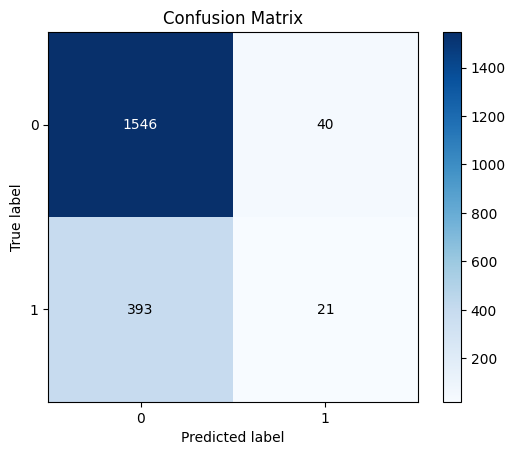

In [8]:
#evaluating the Logistic Classifier on X_test
import sklearn.metrics as metrics
import scikitplot as skplt
y_pred = log1.predict(X_test)
#confusion matrix for the DecTree Classifier
skplt.metrics.plot_confusion_matrix(y_test, y_pred,normalize=False) #set normalize=True for percentages
#calculating other model evalution metrics
print('Precision: '+ str(metrics.precision_score(y_test, y_pred))) #Precision
print('Recall:    ' + str(metrics.recall_score(y_test, y_pred))) #Recall
print('Accuracy:  ' + str(metrics.accuracy_score(y_test, y_pred)))#Accuracy
print('Balanced Acc.: ' + str(metrics.accuracy_score(y_test, y_pred,normalize=True))) # Balanced Accuracy (useful for unbalanced outcome class)

### Question1
Retrain the classifier on the scaled dataset (see above note).
Does the model's predictive performance improve?
...

If so, for which of the three metrics?
...

**Answer**
Scaled datasets improve the model's prediction capacity.
When compared to an untrained data set, the trained data set has improved in terms of precision, recall, and accuracy.

## Plotting ROC and Precision-Recall Curves (LogisticReg)

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

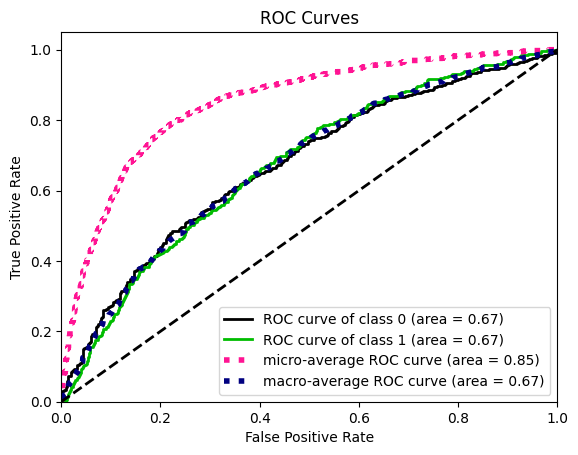

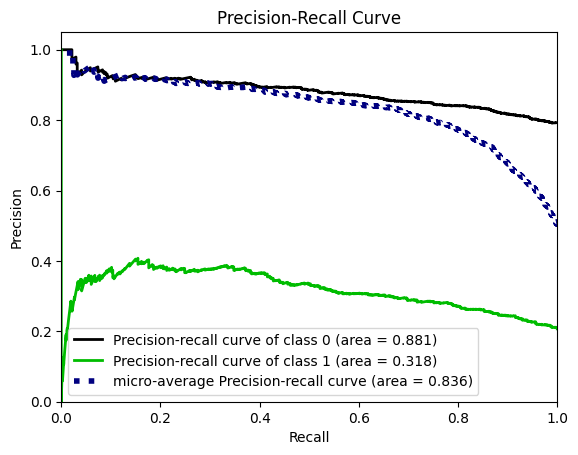

In [9]:
probas = log1.predict_proba(X_test)
#ROC curve
skplt.metrics.plot_roc(y_test, probas)
#Precision-Recall curve
skplt.metrics.plot_precision_recall(y_test, probas)

## Training and evaluating several classification models using k-fold CV

This block is the same we used in activity **2 on Classification**.

We train several classifiers using K-fold CV to improve the metric specified for "scoring=" (in the previous activity we repeated it for precision, recall, and accuracy).

LogisticReg: 0.791300 (0.012092)
K-NN      : 0.762400 (0.008261)
DecisTree: 0.793000 (0.013856)
NaiveBayes: 0.785300 (0.009466)
SVM       : 0.796300 (0.008603)


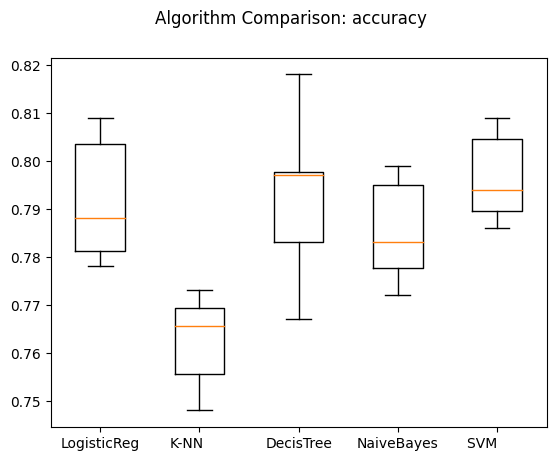

In [10]:
import warnings
warnings.filterwarnings('ignore')
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare models
models = []
models.append(('LogisticReg', LogisticRegression(max_iter=500)))
models.append(('K-NN      ', KNeighborsClassifier()))
models.append(('DecisTree', DecisionTreeClassifier(criterion = 'entropy')))
models.append(('NaiveBayes', GaussianNB()))
models.append(('SVM       ', SVC()))
#models.append(('RandForest', RandomForestClassifier(n_estimators = 10,criterion = 'entropy')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy' #metric we want to compare ('accuracy')
#see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter for complete list of options
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)
 	#Remember, in the next line we specify what data to use X or X_sc (the rest does not change)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison: ' +scoring)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LogisticReg: 0.810900 (0.012373)
K-NN      : 0.816200 (0.007600)
DecisTree: 0.793400 (0.010442)
NaiveBayes: 0.814200 (0.012836)
SVM       : 0.834500 (0.010837)


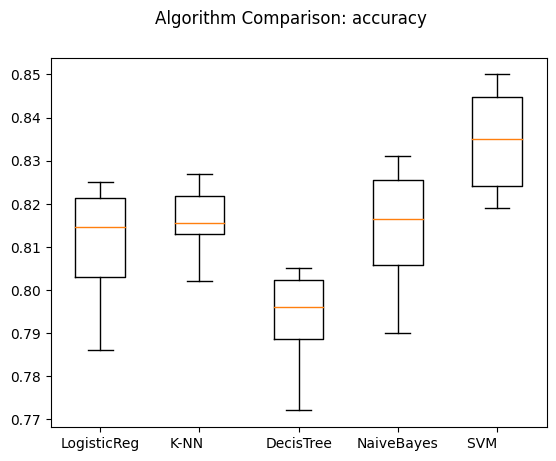

In [11]:
#re-running on scaled dataset

import warnings
warnings.filterwarnings('ignore')
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare models
models = []
models.append(('LogisticReg', LogisticRegression(max_iter=500)))
models.append(('K-NN      ', KNeighborsClassifier()))
models.append(('DecisTree', DecisionTreeClassifier(criterion = 'entropy')))
models.append(('NaiveBayes', GaussianNB()))
models.append(('SVM       ', SVC()))
#models.append(('RandForest', RandomForestClassifier(n_estimators = 10,criterion = 'entropy')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy' #metric we want to compare ('accuracy')
#see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter for complete list of options
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)
 	#Remember, in the next line we specify what data to use X or X_sc (the rest does not change)
	cv_results = model_selection.cross_val_score(model, X_sc, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison: ' +scoring)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Question2
Why is the performance of the SVM classifier so low?

Does training the models on the scaled data fix the issue?


ANSWER: The unscaled data we used as input caused the SVM classifier to perform poorly. We must input scaled data into the SVM classifier in order to enhance its performance.

### Question 3
Which model has the highest Accuracy when you (correctly) train it on the scaled dataset?

ANSWER:
 SVM model

# Using a Neural Network for Classification (predict Customer churn)

Let's use an Artificial Neural Network (ANN) for the same problem.

In [12]:
#install some more things we need
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [13]:
#%tensorflow_version 2.x
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.13.0


In [14]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [15]:
# just to make sure we have the right train/test splits before we proceed
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 123) #train/test split with unscaled data
#Our predictor variables
X_train.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
9216,0.748,0.162162,1.0,0.0,0.333333,1.0,1.0,0.271296,1.0,0.0,0.0,0.0,1.0


## Setting up the NN architecture
We define the following architecture for our ANN in the next cell (and make it a function):
* 1 input layer with 13 nodes; equal to the number of predictor/input variables (see X_train above)
* 2 fully-connected (dense) hidden layer with 32 nodes; we use the Rectifier Linear (ReLu) activation function for the nodes in the hiddern layer.
* 1 output node (we have a binary outcome) with a **Sigmoid** activation function.

Later, we will add another hidder layer

In [16]:
len(X_train.keys())

13

In [17]:
#NOTE:run this cell if you want to delete the model and clear tf session
tf.keras.backend.clear_session()
#del model

In [18]:
def build_model():
  model = keras.Sequential([ #keras.Sequential creates a stack of layers (like a placeholder for layers we want to add)
    layers.Dense(32, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(32, activation='relu'), #uncomment this line to add a 2nd hidden layer later
    layers.Dense(1,activation='sigmoid')
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.002) #https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

  #using cross-entropy as loss function (high when there are more misclassifications between true and predicted labels)
  model.compile(loss='binary_crossentropy', # https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy
                optimizer=optimizer,
                metrics=['accuracy','AUC','TrueNegatives','TruePositives']) # https://www.tensorflow.org/api_docs/python/tf/keras/metrics
  return model

#see the links for more details on loss, metrics, and optimizer options

In [19]:
#call the above function once to create our model (just initializing it)
model=build_model()
# show model architecture (see below for details)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 32) dtype=float32, numpy=
 array([[-1.96079865e-01,  2.89140046e-02, -2.71693885e-01,
         -2.79457897e-01,  2.08248198e-02, -4.37304378e-02,
          7.66748190e-02, -1.96679607e-01, -3.12210470e-01,
         -2.38722339e-01, -2.20004484e-01, -1.95315495e-01,
          2.25217640e-01, -2.23336458e-01, -1.42376646e-01,
         -2.21858650e-01,  3.67752910e-02,  1.77639544e-01,
          1.15805537e-01,  1.19340271e-01, -3.02150548e-01,
         -1.33584291e-01,  1.76059902e-01,  1.31860375e-01,
          6.82050288e-02, -2.62264788e-01,  1.47264183e-01,
          2.50100076e-01, -1.91716418e-01,  2.62697637e-01,
          1.31988525e-03, -1.09451592e-01],
        [ 7.42271841e-02, -1.41130671e-01, -2.77314097e-01,
         -5.37356734e-03, -3.13390642e-01,  9.71945822e-02,
          2.22501636e-01, -1.02259040e-01,  7.51051307e-03,
          1.30291283e-02, -5.08135855e-02, -6.38191998e-02,
         -3.26027125e-01, -5.46168983e-02, -9.89

For the above NN architecture the number of parameters that can be trained are 1537. How so?
we have 1 parameter for each weight and 1 bias parameter for each node (except for our input nodes)
*   13x32=416 (weights connecting each input node to each node in the hidden layer) +
*   32 (bias parameter for nodes in the 1st hidden layer)
*   = 448 parameters
*   32x32=1024 (weights connecting each node in the 1st hidden layer to 32 nodes in the 2nd hidden layer) +
*   32 (bias parameters for nodes in the 2nd hidden layer) = 1056 parameters
*   = 1056
*   32 (weights connecting 32 nodes of the 2nd hidden layer to the ouput node) + 1 (bias for ouput node)
*   = 33


In [21]:
#making sure our X_train has the right shape and we it to our NN
model.predict((X_train[:5]))

1/1 [==============================] - 0s 257ms/step


array([[0.6337277],
       [0.5563923],
       [0.5304836],
       [0.5656579],
       [0.5441547]], dtype=float32)

## Training the NN model

In [22]:
# Feature Scaling, we will use MinMax scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler()
#sc.fit_transform(X_train)

In [23]:
#training the NN on scaled data (NOTE: this is the right way!)
EPOCHS = 100
history = model.fit(
  X_train,y_train,
  epochs=EPOCHS, validation_split = 0.1, verbose=0, #NN trains on the other 90%, validates on 10% in each epoch
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.7881,  auc:0.6395,  loss:0.4893,  true_negatives:5618.0000,  true_positives:56.0000,  val_accuracy:0.7900,  val_auc:0.7199,  val_loss:0.4709,  val_true_negatives:626.0000,  val_true_positives:6.0000,  
....................................................................................................

In [24]:
#take a look at the loss values for the first and last 5 epochs
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head(5), hist.tail(5)

(       loss  accuracy       auc  true_negatives  true_positives  val_loss  \
 0  0.489292  0.788056  0.639482          5618.0            56.0  0.470924   
 1  0.443840  0.811389  0.731924          5659.0           183.0  0.442980   
 2  0.420414  0.822500  0.769858          5623.0           299.0  0.409342   
 3  0.394681  0.835694  0.801818          5582.0           435.0  0.387316   
 4  0.369796  0.850000  0.829940          5570.0           550.0  0.366533   
 
    val_accuracy   val_auc  val_true_negatives  val_true_positives  epoch  
 0       0.79000  0.719851               626.0                 6.0      0  
 1       0.79750  0.784445               623.0                15.0      1  
 2       0.81625  0.812415               610.0                43.0      2  
 3       0.83125  0.837758               614.0                51.0      3  
 4       0.84500  0.854261               611.0                65.0      4  ,
         loss  accuracy       auc  true_negatives  true_positives  val_lo

Our loss here is "binary cross-entropy" (lower is better).
But we will plot Accuracy since you are more familiar with this metrics

Text(0, 0.5, 'Accuracy')

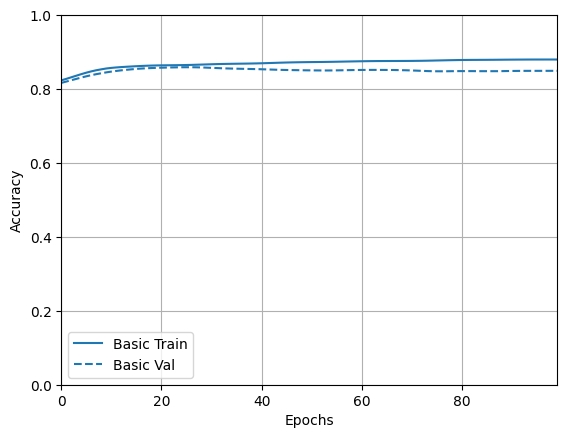

In [25]:
#plotting accuracy values per epoch; shows how accuracy increases as we train the NN
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('Accuracy')

Text(0, 0.5, 'binary cross-entropy')

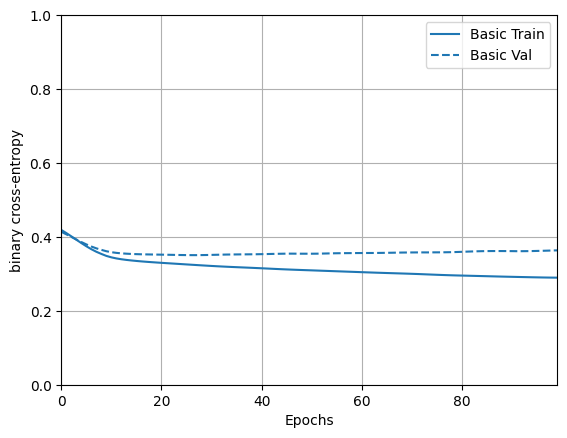

In [26]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('binary cross-entropy')

### Question 4
Does the NN model training converge? If so, around which epoch?




**ANSWER:** Yes,the training of the NN model converges.Around 10 epoch.

What metric do you look at to answer the above question?


ANSWER: We are using accuracy to answer the above question.
Our loss here is binary cross entropy.

## NN model performance

In [27]:
#using the neural network to predict probability of outcome=1 for X_test
model.predict(X_test)
# we consider an obs with a probability of greater&equal than 0.5 to belong to the 1 class
y_pred = model.predict(X_test)[:,0]>=0.5


63/63 [==============================] - 0s 1ms/step


Precision: 0.696113074204947
Recall:    0.4758454106280193
Accuracy:  0.8485
Balanced Acc.: 0.8485


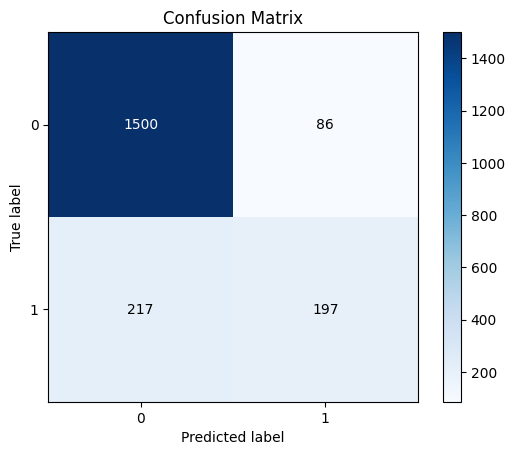

In [28]:
import sklearn.metrics as metrics
import scikitplot as skplt
#confusion matrix for the DecTree Classifier
skplt.metrics.plot_confusion_matrix(y_test, y_pred,normalize=False) #set normalize=True for percentages
#calculating other model evalution metrics
print('Precision: '+ str(metrics.precision_score(y_test, y_pred))) #Precision
print('Recall:    ' + str(metrics.recall_score(y_test, y_pred))) #Recall
print('Accuracy:  ' + str(metrics.accuracy_score(y_test, y_pred)))#Accuracy
print('Balanced Acc.: ' + str(metrics.accuracy_score(y_test, y_pred,normalize=True)))

### Question 5
Does this NN model (13-32-32-1 architecture) have a better Accuracy than the previous classifiers?


ANSWER:Yes, compared to all the prior classifiers, the NN model is more accurate.

## Plotting ROC and Precision-Recall Curves (NN model)

63/63 [==============================] - 0s 1ms/step


<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

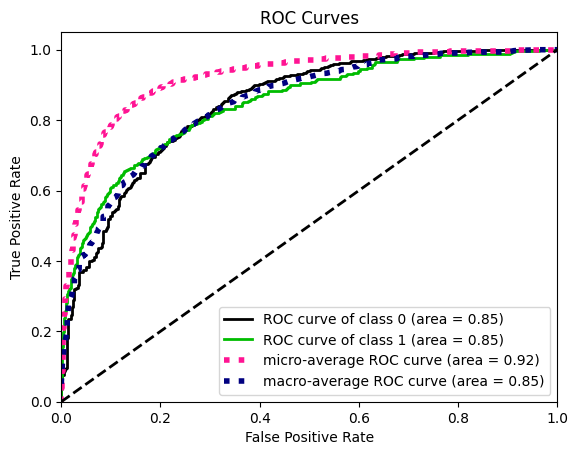

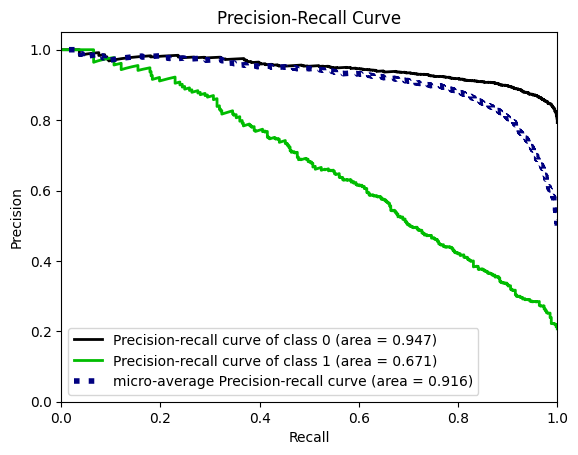

In [29]:
import numpy as np
c1=1-model.predict(X_test)
c0=model.predict(X_test)
probas=np.concatenate((c1,c0),axis=1)
#ROC curve
skplt.metrics.plot_roc(y_test, probas)
#Precision-Recall curve
skplt.metrics.plot_precision_recall(y_test, probas)

### BONUS QUESTION (optional)
Create a neural network architecture with one hidden layer (instead of 2; 13-32-1 architecture), train it, and compare its performance with the first NN (in terms of accuracy, precision, and recall).

You can copy the required cells from above and modify them.

ANSWER: In comparison to the NN architecture with two hidden layers, the NN architecture with one hidden layer performs better.
The precision, recall, and accuracy of the NN architecture with 1 hidden layer are higher than those of the NN design with 2 hidden layers.